# animelytics! >///<
    CIS 545 | Carol Li | 10501401


submission requires presentation, blog post, or session with craig.

## Project Information
MyAnimeList (MAL) is an anime and manga social networking and cataloging application website, in which the site provides its users with a list-like system to organize and score anime and manga. As the most popular anime rating platform there is, MAL contains millions of user data points, well-purposing it for data analytics purposes.

Being able to gauge anime popularity is an important aspect of production. Luckily, MAL contains user data on popularity. This project strives to develop prediction models that use various features to determine the popularity of anime.

### Data
The dataset that used can be found here: https://www.kaggle.com/azathoth42/myanimelist. This study uses:
* `anime_cleaned.csv`
* `animelist_cleaned.csv`

## **0.** Packages and Data

In [1]:
# installing required packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

# baseline regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import metrics
from matplotlib import rcParams

# graph display
import joblib

# currently unused
import pydot
from IPython.display import Image

### Anime List Data
On MAL, users can create lists (known was Anime Lists) comprised of anime they have watched (which also keeps track of the episodes they've watched—very handy!!) and rate the anime out of a scale of 10. 

The following data, from `animelists_cleaned.csv` which essentially eradicates all completely null accounts and obvious fake or invalid data (ie. ridiculously large number of episodes in anime which obviously don't have that much episodes, too-old or too-young users, or things of a simlar nature), contains information from 31284030 users' Anime Lists.

In [2]:
# loading user animelist data
animelist_data = './data/animelists_cleaned.csv'
animelist_df = pd.read_csv(animelist_data)
animelist_df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


### Anime Rating Data
The following .csv, `anime_cleaned.csv`, contains ratings of all the anime listed in MAL. The cleaned dataset truncates data under similar guidelines for `animelist_cleaned.csv` as discussed above.

Note that:
* The `rating` column refers to the maturity rating of the data.
* The `scored_by` column refers to the number of ratings for the data.

In [3]:
# loading anime rating data
anime_data = './data/anime_cleaned.csv'
anime_df = pd.read_csv(anime_data)

In [4]:
# all columns of anime_df
anime_df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

In [5]:
# all genres of values in anime_df
for genre in anime_df['genre']:
    print('***')
    print(genre)

***
Comedy, Supernatural, Romance, Shounen
***
Comedy, Parody, Romance, School, Shounen
***
Comedy, Magic, School, Shoujo
***
Comedy, Drama, Magic, Romance, Fantasy
***
Comedy, Drama, Romance, Shounen
***
Kids, School, Shoujo
***
Magic, Comedy, Romance, School, Shoujo
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Music, Slice of Life, Comedy, Romance, Josei
***
Comedy, Harem, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Comedy, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Slice of Life, Comedy, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Supernatural, Shounen
***
Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen
***
Slice of Life, Drama, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Martial Arts, Shounen
***
Slice of Life, Comedy, Martial Arts, Fantasy
***
Slice of Life, Comedy, Romance, School
***
Comedy, Drama, Romance, Shounen
***
Comedy, School, Shoujo, Super Power
***
Comedy, Dram

***
Action, Military, Super Power, Magic
***
Action, Comedy, Romance
***
Action, Adventure, Magic, Martial Arts, Fantasy
***
Action, Magic, Fantasy, School
***
Action, Historical, Kids
***
Game
***
Slice of Life, Comedy
***
Comedy, Magic, Supernatural
***
Comedy, Romance, Sci-Fi, Shounen
***
Action, Adventure, Mecha, Police, Sci-Fi
***
Parody, Comedy, School
***
Comedy, Josei, Slice of Life
***
Action, Comedy, Supernatural, Ecchi
***
Comedy, Romance
***
Kids, School, Shoujo
***
Romance, School, Shoujo
***
Dementia, Horror, Psychological
***
Action, Adventure, Fantasy
***
Comedy, Demons, Ecchi, Romance, School
***
Slice of Life, Supernatural, Fantasy
***
Action, Ecchi, Harem, Magic
***
Hentai
***
Action, Mecha, Drama, Sci-Fi, Shounen
***
Adventure, Demons, Drama, Fantasy, Magic
***
Slice of Life, Comedy
***
Hentai
***
Action, Comedy, Drama, Magic, Seinen
***
Drama, Historical
***
Action, Sci-Fi, Adventure, Comedy, Drama, Romance
***
Action, Drama, Fantasy, Shounen, Super Power
***
Comed

***
School, Supernatural
***
Action, Sci-Fi, Harem, Comedy, Romance, Ecchi, Fantasy, School
***
Action, Comedy, Romance, School
***
Comedy, School, Shounen, Sports
***
Romance, School, Shoujo
***
Game, Psychological
***
Romance, Shoujo
***
Comedy, Kids, Magic, Military, Sci-Fi
***
Adventure, Kids
***
Action, Comedy, Romance, Fantasy, School, Shounen
***
Action, Adventure, Fantasy, Comedy
***
Ecchi, Drama
***
Music
***
Comedy, School, Seinen, Slice of Life
***
Action, Adventure, Drama, Shounen, Supernatural
***
Action, Harem, Demons, Romance, Ecchi, Fantasy
***
Romance, School, Shoujo
***
Kids, Adventure, Fantasy, Magic
***
Comedy, Ecchi, Slice of Life
***
Action, Military, Sci-Fi, Adventure, Space, Drama, Mecha
***
Action, Adventure, Mecha, Military, Romance, Sci-Fi, Space
***
Fantasy, Magic, Comedy, Shoujo
***
Game
***
Hentai, Demons, Supernatural
***
Game, Slice of Life, School
***
Drama, Historical
***
Action, Harem, Comedy, Supernatural, Magic, Ecchi
***
Comedy, Drama, Fantasy, Mag

Sci-Fi, Space
***
Sports, School, Shounen
***
Hentai
***
Game, Slice of Life, Comedy, School
***
Comedy, Kids, Slice of Life
***
Comedy, Kids
***
Comedy, Romance, Supernatural
***
Comedy, School, Slice of Life
***
Comedy, Romance, Shoujo, Slice of Life
***
Comedy, Fantasy, Parody
***
Comedy, Parody
***
Sci-Fi, Drama, Romance
***
Sci-Fi, Comedy, Police, Mecha
***
Comedy, Sports, Shounen
***
Fantasy, Magic, Romance, Shoujo
***
Drama, Magic, Shoujo
***
Music, Drama, Romance, Fantasy, School
***
Action, Horror, Demons, Drama, Vampire, Shoujo
***
Comedy, School, Shounen, Sports
***
Action, Fantasy, Sci-Fi
***
Ecchi, Comedy, Mecha, Seinen
***
Action, Adventure, Historical
***
Comedy, Drama
***
Comedy, Drama, Fantasy, Magic, Romance, Shoujo
***
Adventure, Fantasy, Kids
***
Comedy, Military, Historical
***
Comedy, School, Seinen, Slice of Life
***
Action, Adventure, Historical, Demons, Martial Arts, Samurai, Shounen
***
Psychological, Supernatural, Drama, Mystery, Seinen
***
Comedy, Romance, S

Hentai
***
Action, Martial Arts, Samurai, Seinen
***
Action, Sci-Fi, Music, Drama, Mecha
***
Hentai
***
Action, Adventure, Fantasy, Horror, Sci-Fi
***
Action, Comedy, Mystery, Supernatural
***
Fantasy, Comedy
***
Hentai
***
Slice of Life, Comedy, Josei
***
Action, Adventure, Fantasy
***
Fantasy
***
Action, Super Power, Sci-Fi
***
Comedy, Magic, Ecchi, Fantasy, School, Shounen
***
Adventure, Mecha, Sci-Fi, Shounen, Space
***
Sci-Fi, Mystery, Drama, Mecha, School
***
Kids
***
Adventure, Fantasy, Psychological
***
Comedy, Slice of Life
***
Comedy, Supernatural
***
Music, School
***
Comedy, Historical, Romance, School, Shoujo, Slice of Life
***
Action, Mecha, Romance, Sci-Fi, Space
***
Music
***
Romance, School, Shoujo
***
Comedy, School, Seinen, Slice of Life
***
Action, Mecha, Sci-Fi, Super Power
***
Comedy, Slice of Life
***
Comedy, Fantasy, Game
***
Mystery, Sci-Fi
***
Drama, School, Super Power
***
Kids
***
Military, Adventure, Drama, Magic, Fantasy, Shounen
***
Adventure, Comedy, Kid

***
Drama, Romance, School
***
Historical, Parody
***
Action, Comedy, Police, Shounen
***
Fantasy, Kids
***
Sci-Fi, Magic, Fantasy
***
Comedy, Romance, Slice of Life
***
Action, Supernatural, Fantasy
***
School
***
Comedy, Parody, Ecchi, Fantasy
***
Comedy, School, Shounen
***
Comedy
***
Action, Comedy, Supernatural, Martial Arts, Shounen
***
Comedy, Ecchi, Shounen, Sports
***
Comedy, Demons, Supernatural, Romance, Fantasy, Shoujo
***
Sci-Fi, Comedy, Kids
***
Action, Sci-Fi, Space, Horror, Drama, Seinen
***
Harem, Mystery, Comedy, Romance, Ecchi, School
***
Comedy, School, Slice of Life
***
Action, Sci-Fi, Adventure, Comedy, Fantasy, Shounen
***
Action, Sci-Fi, Adventure
***
Action, Adventure, Comedy, Mystery, Romance
***
Comedy, Historical, Parody
***
Action, Harem, Demons, Romance, Ecchi, Fantasy
***
Action, Adventure, Comedy, Shounen
***
Action, Drama, Horror, School, Seinen, Supernatural
***
Comedy, Magic, Fantasy
***
Slice of Life, Comedy
***
Sci-Fi, Adventure, Mecha, Shounen
***


***
Comedy, Drama, Mecha, Sci-Fi
***
Music, Slice of Life, Mystery, Romance, School
***
Slice of Life, Comedy, Romance, Josei
***
Hentai
***
Mystery
***
Action, Comedy, Police, Seinen
***
Comedy, Sci-Fi
***
Action, Adventure, Fantasy
***
Adventure, Supernatural, Fantasy, Shounen
***
Comedy, Horror
***
Comedy, Magic
***
Sci-Fi, Adventure
***
Comedy, Sports, Drama, Shounen
***
Hentai
***
Comedy, Demons, Ecchi, Shounen
***
Music
***
Action, Adventure, Kids
***
Comedy, Harem, Romance, Supernatural, Shounen
***
Action, Comedy, Horror, Mystery, Vampire
***
Kids
***
Comedy, Kids, Fantasy
***
Adventure, Comedy, Fantasy, Kids, Magic, Parody
***
Action, Comedy, Kids
***
Comedy, Historical, School, Seinen, Sports
***
Action, Adventure, Mecha, Sci-Fi, Shounen
***
Action, Supernatural, Fantasy
***
Adventure, Fantasy, Historical, Romance
***
Action, Horror, Sci-Fi
***
Slice of Life
***
Action, Mecha, Sci-Fi
***
Action, Adventure, Comedy, Fantasy, Shounen
***
Hentai
***
Game, Adventure, Kids, Fantasy

Adventure, Historical, Supernatural, Martial Arts, Fantasy
***
Comedy
***
Comedy, Ecchi, Fantasy, Harem, Magic, Romance, School, Shounen, Super Power, Supernatural
***
Action, Military, Sci-Fi, Magic, Ecchi
***
Comedy, School, Slice of Life
***
Harem, Comedy, Romance, Ecchi, Fantasy, Seinen
***
Adventure, Fantasy
***
Comedy, Drama, Romance, Ecchi
***
Drama, Hentai, Romance
***
Comedy, Historical
***
Adventure, Comedy, Fantasy, Magic, Romance, Shoujo
***
Action, Magic, Supernatural, Sci-Fi
***
Cars, Seinen, Sports
***
Comedy, Parody, Mecha
***
Action, Horror, Supernatural, Vampire, Seinen
***
Slice of Life, Fantasy, Drama
***
Action, Sci-Fi, School
***
Action, Fantasy, Super Power
***
Action, Adventure, Comedy, Supernatural, Shounen
***
Action, Comedy, Ecchi, Shoujo Ai, Super Power
***
Drama, Fantasy, Psychological, Supernatural
***
Adventure, Comedy, Drama, Fantasy, Magic, Romance, Shoujo
***
Action, Adventure, Comedy, Historical, Romance, Samurai
***
Hentai, School
***
Action, Music, 

Action, Super Power, Supernatural, Thriller
***
Action
***
Action, Adventure, Demons, Drama, Fantasy, Horror, Magic, Military, Romance, Supernatural
***
Ecchi, Sports, Comedy, School
***
Hentai
***
Comedy, Kids, Super Power
***
Adventure, Drama, Fantasy
***
Military, Sci-Fi, Adventure, Drama, Romance, Mecha
***
Action, Adventure, Fantasy, Sci-Fi
***
Action, Mecha
***
Drama, Historical, Psychological, Seinen
***
Slice of Life, School
***
Action, Sci-Fi, Drama, Mecha
***
Slice of Life, Drama, Romance
***
Comedy, Romance, School, Super Power
***
Comedy, Parody, School, Sci-Fi, Shounen
***
Adventure, Drama, Martial Arts, Romance, Shounen, Supernatural
***
Comedy, Ecchi, School, Seinen
***
Hentai
***
Adventure, Hentai, Magic, Sci-Fi
***
Sci-Fi, Sports
***
Comedy, Fantasy, Magic, Slice of Life
***
Comedy, Ecchi, Harem, Romance, Seinen
***
Comedy, Romance, School, Shoujo
***
Horror, Mystery, Supernatural
***
Action, Comedy, Shounen
***
Adventure
***
Slice of Life, Comedy
***
Slice of Life, Ro

***
Action, Fantasy, Shounen Ai, Super Power, Supernatural
***
Adventure, Comedy, Demons, Supernatural, Magic, Fantasy, Shounen
***
Action, Comedy, Drama, Fantasy, Magic, School, Sci-Fi, Shounen, Slice of Life, Super Power, Supernatural
***
Action, Harem, Comedy, Supernatural, Romance, Ecchi, Fantasy, School
***
Slice of Life
***
Hentai
***
Adventure, Historical, Sci-Fi
***
Comedy, Police, Supernatural, Vampire, Shounen
***
Comedy, School, Shounen, Sports
***
Drama, Shounen, Sports
***
Music, Shoujo, Sports
***
Slice of Life
***
Ecchi, Romance, School
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Slice of Life, Comedy, School, Seinen
***
Fantasy, Space
***
Drama, Music, Romance, Slice of Life
***
Drama, Historical, Kids, Slice of Life
***
Drama, Shoujo
***
Harem, Drama, Romance, School
***
Action, Mystery, Horror, Psychological, Supernatural, Drama
***
Hentai
***
Action, Super Power, Supernatural
***
Action, Sci-Fi, Adventure, Space, Comedy, Shounen
***
Fantasy
***
Adve

***
Action, Comedy, Romance, Martial Arts, Seinen
***
Comedy, Ecchi, Harem, Romance, Supernatural
***
Comedy, Supernatural, Romance, School, Seinen
***
Action, Horror, Drama, Fantasy
***
Comedy, School
***
Action, Space, Mecha, Romance, Military, Drama, Sci-Fi
***
Sci-Fi, Comedy, Ecchi
***
Action, Sci-Fi, Horror, Demons, Supernatural
***
Romance, School, Shoujo Ai
***
Mecha, Music
***
Action, Military, Sci-Fi, Space, Drama
***
Action, Adventure, Historical, Martial Arts, Romance
***
Adventure, Slice of Life, Comedy
***
Action, Comedy, Martial Arts, Mystery, Super Power, Supernatural
***
Comedy, Drama, School, Shounen, Slice of Life
***
Adventure, Comedy, Fantasy, Shounen
***
Hentai
***
Action, Adventure, Ecchi, Fantasy
***
Music
***
Comedy, Shounen
***
Action, Ecchi, Martial Arts
***
Music
***
Slice of Life, Comedy, School, Seinen
***
Supernatural, Drama
***
Adventure, Comedy, Demons, Fantasy, Shoujo
***
Action, Police, Drama, Shounen
***
Kids
***
Sci-Fi, Adventure, Space, Supernatural

Comedy, Drama, Ecchi, Fantasy, Harem, Magic, Romance, School, Seinen
***
Kids
***
Comedy, School, Slice of Life
***
Comedy, Drama, Romance, Shounen Ai
***
Action, Military, Sci-Fi, Space, Drama
***
Action, Sci-Fi, Adventure, Space, Mecha
***
Adventure, Comedy, Demons, Fantasy, Shoujo
***
Action, Sci-Fi, Adventure, Sports, Shounen
***
Kids, Magic
***
Adventure, Drama, Fantasy, Shoujo
***
Fantasy
***
Action, Adventure, Comedy, Mecha, Sci-Fi
***
Comedy, Kids
***
Adventure, Comedy, Fantasy, Shounen
***
Drama, Romance, Sci-Fi
***
Hentai
***
Adventure, Fantasy
***
Action, Martial Arts, Comedy, School, Shounen
***
Adventure, Comedy, Slice of Life, Super Power
***
Action, Kids, Mecha
***
Action, Martial Arts, Historical
***
Comedy, Magic, Fantasy
***
Action, Magic
***
Sci-Fi, Adventure, Romance, Fantasy, Josei
***
Action, Drama, Shounen, Sports
***
Comedy, Fantasy, Kids
***
Adventure, Comedy, Mystery, Police, Shounen, Sports
***
Action, Fantasy, Magic, Shoujo
***
Adventure, Comedy, Fantasy, Hi

***
Comedy, School, Shoujo, Shounen Ai, Slice of Life
***
Action, Super Power, Martial Arts, School
***
Comedy, Parody, Seinen, Sports, Super Power
***
Adventure, Comedy, Ecchi, Fantasy, Magic
***
Slice of Life, Magic, Fantasy
***
Adventure, Comedy, Mystery, Police, Shounen
***
Action, Comedy, School
***
Fantasy, Hentai
***
Slice of Life, Comedy, Romance, School, Seinen, Shoujo Ai
***
Action, Fantasy, Magic, Supernatural
***
Harem, Comedy, Romance
***
Drama, Fantasy, Magic, Slice of Life
***
Horror, Mystery, Psychological, Thriller
***
Mystery, Romance, Supernatural
***
Adventure, Comedy, Romance, Shounen
***
Comedy, Parody
***
Sci-Fi
***
Adventure, Comedy, Sports
***
Slice of Life, Comedy
***
Action, Sci-Fi, Mystery, Drama
***
Hentai
***
Parody
***
Slice of Life, Historical, Drama, Seinen
***
Action, Slice of Life, Comedy, Historical, Drama, Fantasy
***
Fantasy, Sci-Fi, Shounen, Slice of Life
***
Action, Adventure, Cars, Sci-Fi
***
Drama, Ecchi, Harem, Romance
***
Action, Sci-Fi, Horr

Action, Game, Adventure, Demons, Shounen
***
Adventure, Horror, Magic, Martial Arts, Shounen, Supernatural
***
Action, Adventure, Comedy, Super Power, Fantasy, Shounen
***
Action, Adventure, Comedy, Super Power, Fantasy, Shounen
***
Adventure, Fantasy, Mystery, Shounen, Supernatural
***
Action, Comedy, Ecchi, Fantasy, Harem, Romance, School, Sci-Fi, Supernatural
***
Ecchi
***
Action, Seinen
***
Comedy, Romance, School, Seinen, Slice of Life
***
Comedy, School, Seinen, Sports
***
Comedy, Drama, Romance, Sci-Fi, Slice of Life
***
Adventure, Mecha, Romance, Sci-Fi
***
Action, Sci-Fi, Harem, Comedy, Ecchi, Mecha
***
Adventure, Fantasy
***
Action, Adventure, Magic, Fantasy
***
Slice of Life, Fantasy, Seinen
***
Action, Comedy, Magic, Fantasy
***
Action, Demons, Horror, Shounen, Supernatural
***
Action, Comedy, Fantasy, Martial Arts, Shounen
***
Action, Military, Sci-Fi, Adventure, Horror, Supernatural
***
Action, Game, Sci-Fi, Shounen
***
Action, Supernatural, Fantasy
***
Hentai
***
Action,

In [6]:
# all studios of values in anime_df -> easy grouping
for studio in anime_df['studio']:
    print('***')
    print(studio)

***
David Production
***
Gonzo
***
Satelight
***
Hal Film Maker
***
J.C.Staff
***
Studio Pierrot, Studio Hibari
***
Production Reed
***
J.C.Staff
***
J.C.Staff
***
Bones
***
Studio Deen
***
J.C.Staff
***
Studio Deen
***
Brain&#039;s Base
***
Studio Pierrot
***
Madhouse
***
Production I.G
***
Studio Pierrot
***
Studio Deen
***
J.C.Staff
***
J.C.Staff
***
Group TAC
***
Hal Film Maker
***
Madhouse
***
Studio Deen
***
Madhouse
***
TMS Entertainment
***
Pierrot Plus
***
Studio Pierrot
***
Tatsunoko Production
***
Hal Film Maker, TYO Animations
***
Shin-Ei Animation
***
Studio Deen
***
Madhouse
***
Toei Animation
***
Tokyo Movie Shinsha
***
Toei Animation
***
Madhouse
***
Sunrise
***
Zexcs
***
J.C.Staff
***
J.C.Staff
***
Sunrise
***
J.C.Staff
***
J.C.Staff
***
TMS Entertainment
***
Madhouse
***
J.C.Staff
***
Production I.G
***
Studio Deen
***
Studio Deen
***
Studio Deen
***
Yumeta Company
***
TMS Entertainment
***
Lerche
***
Studio Pierrot
***
Production I.G, Zexcs
***
Kachidoki Studio
***
G

Suzuki Mirano
***
BreakBottle
***
J.C.Staff
***
SynergySP
***
Studio Gallop
***
Studio Pierrot
***
Studio Deen
***
Shin-Ei Animation
***
Production I.G
***
Madhouse
***
Brain&#039;s Base
***
Brain&#039;s Base
***
Kyoto Animation
***
ufotable
***
Nippon Animation
***
Gonzo
***
Toei Animation
***
Toei Animation
***
Production I.G
***
Studio Deen
***
Tokyo Kids
***
David Production
***
Studio Pierrot
***
Studio Ghibli, Studio Hibari
***
Studio Pierrot
***
Madhouse, Studio 4°C
***
Toei Animation
***
feel.
***
Sunrise
***
TYO Animations
***
Rabbit Machine
***
Studio Deen
***
J.C.Staff
***
Nippon Animation
***
Studio Pierrot
***
Hal Film Maker
***
Telecom Animation Film, Graphinica
***
Studio Pierrot
***
Sunrise
***
Studio Gallop
***
Sunrise
***
A-1 Pictures
***
Silver Link.
***
Studio Pierrot
***
Manglobe
***
Nippon Animation
***
Shin-Ei Animation
***
Polygon Pictures
***
Group TAC
***
Diomedea
***
TNK
***
AIC Plus+
***
Studio Deen
***
Picture Magic
***
Madhouse
***
AIC
***
Tezuka Productio

Studio 3Hz
***
AIC
***
Kachidoki Studio
***
Seven
***
Toei Animation
***
Satelight
***
J.C.Staff
***
Haoliners Animation League
***
Artland, AIC, Artmic
***
Satelight
***
Group TAC
***
TMS Entertainment
***
AIC
***
Lerche
***
Artland
***
Future Planet, Beijing Huihuang Animation Company
***
Sunrise
***
CoMix Wave Films
***
Studio Ghibli
***
J.C.Staff
***
Shin-Ei Animation
***
Toei Animation
***
Studio Deen
***
Trigger
***
Sunrise
***
ufotable, feel., Studio Flag
***
AIC A.S.T.A.
***
ufotable
***
J.C.Staff
***
Think Corporation
***
SynergySP
***
Vasoon Animation
***
Kachidoki Studio
***
J.C.Staff
***
Gainax
***
A-1 Pictures
***
Arms
***
Toei Animation
***
Tezuka Productions
***
Lay-duce
***
Toei Animation
***
Shin-Ei Animation
***
A-1 Pictures
***
Gonzo
***
TMS Entertainment, Telecom Animation Film
***
Sunrise
***
David Production
***
Shaft
***
TMS Entertainment
***
Hal Film Maker
***
Shin-Ei Animation
***
Studio Matrix
***
Toei Animation
***
Nomad
***
Actas
***
Toei Animation
***
Bridg

***
Kinema Citrus
***
Shaft
***
Brain&#039;s Base
***
Diomedea
***
Doga Kobo
***
Toei Animation
***
Kyoto Animation
***
Haoliners Animation League
***
Studio Comet
***
J.C.Staff
***
Tatsunoko Production
***
J.C.Staff
***
Indeprox
***
Kinema Citrus
***
Craftar
***
Toei Animation
***
AIC
***
Satelight
***
LIDENFILMS
***
Studio Deen
***
Sunrise
***
Production I.G
***
TMS Entertainment
***
Nippon Animation
***
Ajia-Do
***
ufotable
***
Studio Pierrot
***
Kachidoki Studio
***
Hoods Entertainment, teamKG
***
Diomedea
***
Nippon Animation
***
D &amp; D Pictures
***
Vega Entertainment
***
Toei Animation
***
Lerche
***
Sunrise
***
Sunrise
***
Studio Pierrot, Studio Deen
***
Toei Animation
***
Production IMS
***
Studio Deen
***
Gonzo, Asread
***
Hoods Entertainment
***
PoRO
***
Shin-Ei Animation
***
Seven
***
Studio Deen
***
Sunrise
***
A-1 Pictures
***
Signal. MD
***
Studio Deen
***
LIDENFILMS
***
OLM
***
Production I.G
***
Madhouse
***
Kyoto Animation, Tatsunoko Production
***
ufotable
***
Stud

***
Doga Kobo
***
Knack Productions
***
Bouncy
***
Toei Animation
***
Studio Ghibli
***
Sunrise
***
Nomad
***
DLE
***
Satelight
***
Studio Deen
***
Haoliners Animation League
***
Fanworks
***
OLM Digital, Signal. MD
***
Sunrise
***
Madhouse
***
Creators in Pack
***
Studio Pierrot
***
Madhouse
***
ufotable
***
Bones
***
Studio Deen
***
Kyoto Animation
***
Sunrise
***
DLE
***
Gakken Eigakyoku
***
Production Reed
***
Madhouse
***
MAPPA
***
Toei Animation
***
Madhouse
***
Production I.G
***
OLM
***
Doga Kobo
***
AIC
***
Milky Cartoon
***
Madhouse
***
CoMix Wave Films
***
SANZIGEN
***
Madhouse
***
Bee Train
***
Doga Kobo
***
Satelight
***
J.C.Staff, Artland
***
Madhouse
***
Madhouse
***
Studio Pierrot
***
Studio Pierrot
***
P.A. Works
***
Madhouse
***
J.C.Staff
***
Toei Animation
***
Madhouse
***
Gainax
***
Nippon Animation
***
Madhouse
***
Suzuki Mirano
***
Bones
***
Studio Deen
***
Collaboration Works
***
Rockwell Eyes
***
A-1 Pictures
***
Arms
***
Toei Animation
***
Bones
***
Zexcs
***
K

Production I.G
***
Tatsunoko Production
***
Sunrise
***
Flavors Soft
***
Asread
***
ufotable
***
Madhouse
***
Kinema Citrus
***
Gonzo, Satelight
***
Encourage Films
***
Toei Animation
***
Kyoto Animation
***
Bones, Production I.G, Studio 4°C, Toei Animation
***
Madhouse
***
Toei Animation
***
A-1 Pictures, Ordet
***
B&amp;T
***
Toei Animation
***
Gonzo
***
TMS Entertainment
***
Group TAC
***
Studio Deen
***
Toei Animation
***
A-1 Pictures
***
OLM
***
Actas
***
Toei Animation
***
Production I.G, M.S.C
***
Studio Pierrot
***
AIC
***
Piso Studio
***
Toei Animation
***
Ajia-Do
***
Toei Animation
***
Studio Ghibli
***
Xebec, Issen
***
Shaft
***
Studio Hibari
***
AIC
***
Sunrise
***
Passione
***
Brain&#039;s Base
***
APPP
***
Signal. MD
***
Arms
***
MAPPA
***
The Answer Studio
***
Studio Pierrot
***
Seven
***
Sunrise
***
Madhouse
***
J.C.Staff
***
Madhouse
***
PoRO
***
Xebec, OLM
***
Boyan Pictures
***
RG Animation Studios
***
Seven
***
Production Reed
***
Haoliners Animation League
***
DLE


***
White Fox
***
Production I.G
***
Studio Pierrot
***
Gainax, Production I.G
***
Pie in The Sky
***
Studio Pierrot
***
Studio Pierrot
***
Heewon Entertainment
***
Studio Deen
***
Madhouse
***
J.C.Staff
***
Ishikawa Pro
***
Nexus
***
Doga Kobo
***
Toei Animation
***
Studio Gallop
***
Mushi Production
***
Shin-Ei Animation
***
Studio Pierrot
***
J.C.Staff
***
Satelight
***
J.C.Staff
***
Gonzo
***
Toei Animation
***
Tatsunoko Production
***
Gonzo
***
J.C.Staff
***
J.C.Staff
***
PoRO
***
PoRO
***
ufotable
***
Yaoyorozu
***
RG Animation Studios
***
Telecom Animation Film
***
Shin-Ei Animation
***
Project No.9
***
J.C.Staff
***
Lerche
***
Gainax
***
A-1 Pictures
***
Suzuki Mirano
***
Next Media Animation
***
P.A. Works
***
Sunrise
***
Studio Comet
***
Haoliners Animation League, Studio LAN
***
Production I.G, Xebec
***
Bandai Namco Pictures
***
TMS Entertainment
***
Shuka
***
W-Toon Studio, DMM.futureworks
***
AIC Spirits, BeSTACK
***
PoRO
***
Madhouse, Tatsunoko Production
***
Toei Animat

***
Shin-Ei Animation
***
Collaboration Works
***
Xebec
***
Shaft
***
Toei Animation
***
Bee Train
***
J.C.Staff
***
Brain&#039;s Base
***
PoRO
***
OLM
***
Studio Pierrot
***
Sunrise
***
Tatsunoko Production
***
Shaft
***
Toei Animation
***
Production I.G
***
Studio Deen
***
AIC Plus+
***
Gainax, Magic Bus
***
Toei Animation
***
PrimeTime
***
Gonzo
***
DLE
***
TNK
***
Production I.G, Xebec
***
Tatsunoko Production, SynergySP
***
Studio Pierrot
***
Brain&#039;s Base
***
Shanghai Animation Film Studio
***
Shuka
***
Arms
***
Haoliners Animation League
***
Studio Gokumi
***
A.C.G.T.
***
TMS Entertainment
***
Nippon Animation
***
Zexcs
***
Tokyo Movie Shinsha
***
Production I.G
***
Seven Arcs Pictures
***
Nippon Animation
***
Studio Deen
***
RG Animation Studios
***
Brain&#039;s Base, Marvy Jack
***
Millepensee, GEMBA
***
Madhouse
***
Mushi Production
***
Bones
***
Echoes
***
DLE
***
Shin-Ei Animation
***
Usagi Ou
***
Brain&#039;s Base
***
Production I.G
***
Media Bank
***
Sunrise
***
Kyoto

***
A-1 Pictures
***
Studio Pierrot
***
feel.
***
Xebec
***
Satelight
***
Shirogumi, Shin-Ei Animation
***
Nomad
***
Polygon Pictures
***
Bones
***
Gonzo
***
Production Reed
***
Satelight
***
OLM Digital
***
Magic Bus
***
Silver Link.
***
Actas
***
Studio Pierrot
***
J.C.Staff
***
Oxybot
***
Sunrise
***
Toei Animation
***
Arms
***
J.C.Staff
***
Sunrise
***
EMT²
***
Gonzo
***
Daume
***
Studio Pierrot
***
Tatsunoko Production
***
Studio Fantasia
***
Milky Cartoon
***
Studio Deen
***
feel.
***
Namu Animation
***
Madhouse
***
D &amp; D Pictures
***
Studio Deen
***
Sunrise
***
Sunrise
***
Bones
***
Studio Gallop
***
Kyoto Animation
***
Xebec
***
Studio Ponoc
***
PoRO
***
Studio Hibari
***
DLE
***
A-1 Pictures, TROYCA
***
Kyoto Animation
***
Echoes
***
Zexcs
***
AIC
***
Arms
***
Zexcs
***
Studio Gallop
***
Production I.G
***
J.C.Staff
***
Silver Link.
***
Seven
***
DLE
***
Sunrise
***
TMS Entertainment
***
Toei Animation
***
White Fox
***
Signal. MD
***
Trans Arts
***
OLM
***
AT-2
***
Studio

AIC
***
A-1 Pictures
***
DLE
***
Toei Animation
***
TMS Entertainment
***
Satelight
***
J.C.Staff
***
Sunrise
***
OLM
***
OLM
***
LIDENFILMS
***
dwarf
***
Nippon Animation
***
Kachidoki Studio
***
Madhouse
***
Brain&#039;s Base
***
DLE
***
Kyoto Animation
***
Bones
***
Seven
***
Studio Deen
***
Sunrise
***
Sunrise
***
Toei Animation
***
feel.
***
Toei Animation
***
Tokyo Movie Shinsha
***
TUBA
***
J.C.Staff
***
Shanghai Foch Film Culture Investment
***
Milky Cartoon
***
DLE
***
Kyoto Animation
***
ILCA
***
P.A. Works
***
Xebec
***
Office Takeout
***
Studio Jam
***
Opera House
***
J.C.Staff
***
Daume
***
TYO Animations
***
White Fox
***
Xebec, Issen
***
OLM
***
WAO World, MooGoo
***
Artland, Magic Bus
***
Nippon Animation
***
Production I.G
***
Pops Inc.
***
Brain&#039;s Base
***
Satelight
***
Shaft
***
PoRO
***
Artland, TNK
***
Hoods Drifters Studio
***
J.C.Staff
***
GoHands
***
Toei Animation
***
Brain&#039;s Base
***
Sunrise
***
AIC Classic
***
Gainax
***
Studio Ghibli
***
Knack Prod

In [7]:
# all airing years in anime_df
for date in anime_df['aired_from_year']:
    print('***')
    print(date)

***
2012.0
***
2007.0
***
2008.0
***
2002.0
***
2012.0
***
2009.0
***
2003.0
***
2007.0
***
2008.0
***
2006.0
***
2008.0
***
2010.0
***
2011.0
***
2012.0
***
2004.0
***
2002.0
***
2009.0
***
2007.0
***
1989.0
***
2008.0
***
2011.0
***
2004.0
***
2008.0
***
2013.0
***
2006.0
***
2011.0
***
2008.0
***
2011.0
***
2009.0
***
2011.0
***
2010.0
***
1992.0
***
2001.0
***
2006.0
***
1999.0
***
2005.0
***
2006.0
***
2007.0
***
2000.0
***
2010.0
***
2010.0
***
2006.0
***
2012.0
***
2010.0
***
2007.0
***
2012.0
***
1998.0
***
2000.0
***
2011.0
***
2011.0
***
2007.0
***
2008.0
***
2006.0
***
2016.0
***
2017.0
***
2002.0
***
2015.0
***
2016.0
***
1998.0
***
2011.0
***
2000.0
***
2010.0
***
2016.0
***
2016.0
***
2013.0
***
2008.0
***
2015.0
***
1997.0
***
2018.0
***
2016.0
***
2014.0
***
1994.0
***
2010.0
***
2001.0
***
2010.0
***
2005.0
***
2006.0
***
2010.0
***
2013.0
***
2016.0
***
2004.0
***
2014.0
***
2015.0
***
2013.0
***
2017.0
***
2017.0
***
1978.0
***
2017.0
***
1997.0
***
2015.0
***
2018.0

2012.0
***
2008.0
***
2008.0
***
2006.0
***
2015.0
***
1998.0
***
2016.0
***
1987.0
***
2016.0
***
2014.0
***
2010.0
***
2012.0
***
1993.0
***
2015.0
***
2003.0
***
2002.0
***
1994.0
***
2012.0
***
2012.0
***
2008.0
***
2002.0
***
1981.0
***
2012.0
***
2010.0
***
1988.0
***
1993.0
***
2018.0
***
1994.0
***
2009.0
***
2001.0
***
2011.0
***
2017.0
***
2011.0
***
2013.0
***
1990.0
***
2008.0
***
2008.0
***
2014.0
***
2002.0
***
2017.0
***
2013.0
***
1996.0
***
2014.0
***
2008.0
***
2016.0
***
2002.0
***
2011.0
***
2003.0
***
1966.0
***
1995.0
***
2016.0
***
2007.0
***
2014.0
***
2005.0
***
2010.0
***
2010.0
***
2000.0
***
2017.0
***
2008.0
***
1986.0
***
2017.0
***
1991.0
***
1965.0
***
2017.0
***
2003.0
***
2013.0
***
2006.0
***
2006.0
***
1989.0
***
2014.0
***
1989.0
***
2011.0
***
2004.0
***
2016.0
***
2016.0
***
2003.0
***
2016.0
***
2013.0
***
2015.0
***
2017.0
***
2011.0
***
2007.0
***
1998.0
***
1988.0
***
1987.0
***
2012.0
***
2015.0
***
2014.0
***
1992.0
***
2000.0
***
1991.0
***

***
2002.0
***
2014.0
***
2006.0
***
1981.0
***
1997.0
***
1989.0
***
2001.0
***
2010.0
***
2002.0
***
2014.0
***
2016.0
***
1987.0
***
2014.0
***
2015.0
***
1999.0
***
2015.0
***
2011.0
***
2007.0
***
2010.0
***
2009.0
***
2013.0
***
2017.0
***
2009.0
***
1986.0
***
1984.0
***
2016.0
***
1992.0
***
1974.0
***
2009.0
***
1996.0
***
2014.0
***
2017.0
***
2007.0
***
2007.0
***
2017.0
***
1986.0
***
2003.0
***
2001.0
***
2001.0
***
1989.0
***
2015.0
***
2007.0
***
2006.0
***
2002.0
***
2013.0
***
1984.0
***
2017.0
***
2017.0
***
2009.0
***
2015.0
***
2013.0
***
2013.0
***
2012.0
***
2001.0
***
2011.0
***
2015.0
***
2015.0
***
1981.0
***
2010.0
***
2015.0
***
2018.0
***
2010.0
***
2012.0
***
1999.0
***
2004.0
***
2015.0
***
2015.0
***
2013.0
***
2001.0
***
1990.0
***
2015.0
***
1985.0
***
2007.0
***
2003.0
***
2018.0
***
2013.0
***
2018.0
***
2006.0
***
2013.0
***
2000.0
***
2018.0
***
2012.0
***
2015.0
***
2010.0
***
1994.0
***
2015.0
***
1998.0
***
2004.0
***
2006.0
***
2013.0
***
2012.0

***
2012.0
***
2010.0
***
2007.0
***
1995.0
***
2016.0
***
2014.0
***
2016.0
***
2014.0
***
2009.0
***
2017.0
***
1993.0
***
1969.0
***
1991.0
***
2016.0
***
2006.0
***
2017.0
***
2007.0
***
2001.0
***
2006.0
***
2002.0
***
2003.0
***
2008.0
***
2012.0
***
2014.0
***
1986.0
***
2013.0
***
2018.0
***
2014.0
***
2017.0
***
2015.0
***
2016.0
***
2016.0
***
2007.0
***
2006.0
***
2015.0
***
2018.0
***
2013.0
***
2004.0
***
2011.0
***
1978.0
***
2014.0
***
2004.0
***
2007.0
***
2010.0
***
1990.0
***
2002.0
***
2007.0
***
2008.0
***
1989.0
***
2008.0
***
1986.0
***
2004.0
***
2014.0
***
2004.0
***
2018.0
***
2011.0
***
2012.0
***
2016.0
***
1993.0
***
2010.0
***
2010.0
***
2017.0
***
2003.0
***
2011.0
***
1986.0
***
2012.0
***
2014.0
***
2008.0
***
2016.0
***
2001.0
***
2011.0
***
2018.0
***
1980.0
***
2002.0
***
2013.0
***
2014.0
***
1984.0
***
2015.0
***
1999.0
***
2017.0
***
2008.0
***
1988.0
***
2017.0
***
2013.0
***
2015.0
***
2010.0
***
2015.0
***
2004.0
***
2017.0
***
2013.0
***
2017.0

2018.0
***
2012.0
***
2006.0
***
2013.0
***
2012.0
***
2016.0
***
2013.0
***
2013.0
***
2009.0
***
1983.0
***
1979.0
***
2015.0
***
2006.0
***
2015.0
***
2015.0
***
2014.0
***
2011.0
***
2001.0
***
1992.0
***
1984.0
***
2017.0
***
2011.0
***
2018.0
***
1997.0
***
2008.0
***
2001.0
***
1983.0
***
2014.0
***
2013.0
***
2013.0
***
2015.0
***
2005.0
***
2015.0
***
2018.0
***
2001.0
***
2015.0
***
2009.0
***
2001.0
***
1995.0
***
2013.0
***
2016.0
***
2011.0
***
2005.0
***
1987.0
***
2013.0
***
2008.0
***
1996.0
***
2002.0
***
2015.0
***
2017.0
***
2015.0
***
2015.0
***
2008.0
***
2016.0
***
2011.0
***
2015.0
***
1989.0
***
2003.0
***
2007.0
***
1984.0
***
2011.0
***
2016.0
***
2014.0
***
2015.0
***
2017.0
***
2017.0
***
1984.0
***
2016.0
***
2012.0
***
1996.0
***
2007.0
***
1977.0
***
2006.0
***
2014.0
***
2005.0
***
2014.0
***
2013.0
***
2003.0
***
2016.0
***
1994.0
***
2011.0
***
2017.0
***
2011.0
***
2007.0
***
2007.0
***
2017.0
***
2010.0
***
2015.0
***
2009.0
***
2017.0
***
2014.0
***

2005.0
***
2015.0
***
1989.0
***
2011.0
***
2001.0
***
2016.0
***
2001.0
***
2016.0
***
1994.0
***
1988.0
***
2014.0
***
1997.0
***
1992.0
***
2017.0
***
2017.0
***
1980.0
***
2006.0
***
2014.0
***
2018.0
***
2015.0
***
2016.0
***
2007.0
***
2009.0
***
2013.0
***
2006.0
***
2014.0
***
2017.0
***
2012.0
***
2014.0
***
2014.0
***
2009.0
***
2017.0
***
2016.0
***
2007.0
***
1999.0
***
2016.0
***
1990.0
***
2005.0
***
2016.0
***
2016.0
***
2011.0
***
2014.0
***
2004.0
***
2011.0
***
2016.0
***
2017.0
***
2009.0
***
2007.0
***
2006.0
***
2009.0
***
2014.0
***
2000.0
***
2015.0
***
2017.0
***
2013.0
***
1989.0
***
2007.0
***
2017.0
***
1975.0
***
2010.0
***
2004.0
***
2014.0
***
2011.0
***
2014.0
***
2004.0
***
2014.0
***
2011.0
***
1990.0
***
2017.0
***
2005.0
***
2007.0
***
2010.0
***
2007.0
***
2017.0
***
2006.0
***
1987.0
***
2017.0
***
2011.0
***
2000.0
***
2014.0
***
2015.0
***
2016.0
***
2017.0
***
2007.0
***
1987.0
***
1970.0
***
2015.0
***
2015.0
***
2011.0
***
2004.0
***
1993.0
***

***
2015.0
***
1992.0
***
2010.0
***
2010.0
***
2015.0
***
2003.0
***
2000.0
***
2006.0
***
1990.0
***
1986.0
***
2013.0
***
2014.0
***
2004.0
***
2016.0
***
2017.0
***
1983.0
***
1992.0
***
2016.0
***
2015.0
***
2010.0
***
2017.0
***
2000.0
***
2012.0
***
1970.0
***
1996.0
***
2009.0
***
2010.0
***
1987.0
***
2015.0
***
1972.0
***
2005.0
***
2008.0
***
1995.0
***
2010.0
***
2016.0
***
2005.0
***
2013.0
***
2008.0
***
2015.0
***
2017.0
***
2005.0
***
2015.0
***
2002.0
***
2017.0
***
2016.0
***
2008.0
***
2016.0
***
2017.0
***
2011.0
***
2017.0
***
2015.0
***
1996.0
***
2016.0
***
1998.0
***
2014.0
***
1964.0
***
2005.0
***
1973.0
***
1979.0
***
2016.0
***
1993.0
***
1995.0
***
2016.0
***
1980.0
***
2014.0
***
1982.0
***
2015.0
***
2013.0
***
1977.0
***
2017.0
***
2014.0
***
1991.0
***
2001.0
***
2015.0
***
2014.0
***
2017.0
***
2016.0
***
1992.0
***
2013.0
***
2007.0
***
2013.0
***
2018.0
***
2016.0
***
2013.0
***
1989.0
***
2012.0
***
2005.0
***
2016.0
***
2003.0
***
2009.0
***
1972.0

***
1979.0
***
2009.0
***
1995.0
***
2008.0
***
2011.0
***
2016.0
***
2003.0
***
2008.0
***
2004.0
***
2005.0
***
2016.0
***
2004.0
***
2016.0
***
2017.0
***
2016.0
***
2011.0
***
2014.0
***
2017.0
***
2005.0
***
2014.0
***
1985.0
***
2017.0
***
2009.0
***
2010.0
***
2016.0
***
2016.0
***
2001.0
***
2009.0
***
1980.0
***
2012.0
***
1986.0
***
2016.0
***
2004.0
***
2016.0
***
1971.0
***
2006.0
***
2008.0
***
2013.0
***
2018.0
***
2015.0
***
1997.0
***
2007.0
***
2010.0
***
2009.0
***
2012.0
***
2017.0
***
2010.0
***
2005.0
***
2006.0
***
1991.0
***
2017.0
***
1985.0
***
2016.0
***
2014.0
***
2010.0
***
2006.0
***
2003.0
***
2012.0
***
2015.0
***
2014.0
***
2010.0
***
2016.0
***
2008.0
***
1996.0
***
2012.0
***
1998.0
***
2006.0
***
2017.0
***
1999.0
***
2001.0
***
2018.0
***
2001.0
***
1987.0
***
2016.0
***
2010.0
***
2013.0
***
2016.0
***
1988.0
***
2003.0
***
2008.0
***
2009.0
***
2011.0
***
2006.0
***
2014.0
***
1991.0
***
2010.0
***
2014.0
***
1999.0
***
2017.0
***
2013.0
***
2003.0

### Merging AnimeList and Anime Stats

Joining on shared column, `anime_id`.

We want to conduct analysis on user ratings on different anime. `animelist_df` contains user Anime Lists, where they rate the anime that they've watched.


In [8]:
merged_anime_df_whole = pd.merge(animelist_df, anime_df, on='anime_id')
merged_anime_df_whole

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,...,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0
1,Damonashu,21,418,0000-00-00,0000-00-00,10,1,0.0,0,2009-09-30 07:39:05,...,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0
2,bskai,21,75,0000-00-00,0000-00-00,8,1,0.0,0,2010-06-15 21:31:23,...,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0
3,Slimak,21,834,0000-00-00,0000-00-00,10,1,0.0,0,2018-05-01 12:05:21,...,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0
4,MistButterfly,21,808,0000-00-00,0000-00-00,0,1,NaN,0,2018-04-04 20:55:34,...,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31284025,animekanji,37896,0,2018-05-19,0000-00-00,0,1,0.0,0,2018-05-19 10:41:31,...,NaN,"{'Prequel': [{'mal_id': 37895, 'type': 'anime'...",iQIYI,NaN,Shanghai Foch Film Culture Investment,Fantasy,[],[],12.0,2018.0
31284026,AnimeKhor,37896,0,0000-00-00,0000-00-00,0,6,0.0,0,2018-05-18 14:58:34,...,NaN,"{'Prequel': [{'mal_id': 37895, 'type': 'anime'...",iQIYI,NaN,Shanghai Foch Film Culture Investment,Fantasy,[],[],12.0,2018.0
31284027,FeliX_,37620,0,0000-00-00,0000-00-00,0,6,0.0,0,2018-04-22 17:58:24,...,NaN,"{'Other': [{'mal_id': 37619, 'type': 'anime', ...","Tencent Penguin Pictures, China Literature Lim...",NaN,Shanghai Foch Film Culture Investment,"Sports, Romance, School",[],[],12.0,2017.0
31284028,gasparsousa,37620,0,0000-00-00,0000-00-00,0,6,0.0,0,2018-04-23 02:30:52,...,NaN,"{'Other': [{'mal_id': 37619, 'type': 'anime', ...","Tencent Penguin Pictures, China Literature Lim...",NaN,Shanghai Foch Film Culture Investment,"Sports, Romance, School",[],[],12.0,2017.0


In [9]:
merged_anime_df_whole.columns

Index(['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags', 'title',
       'title_english', 'title_japanese', 'title_synonyms', 'image_url',
       'type', 'source', 'episodes', 'status', 'airing', 'aired_string',
       'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'],
      dtype='object')

### Taking a Random Sample
Reducing the dataset to 1% of its original size so it won't take forever to run.

In [10]:
# 31284030 * 0.1 = 312840
merged_anime_df = merged_anime_df_whole.sample(n=312840, random_state=1)
merged_anime_df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
2713527,SanGoten,1575,2,0000-00-00,0000-00-00,8,1,0.0,0,2008-03-15 21:47:53,...,Fridays at 01:25 (JST),"{'Adaptation': [{'mal_id': 1528, 'type': 'mang...","Bandai Visual, Mainichi Broadcasting System, B...","Funimation, Bandai Entertainment",Sunrise,"Action, Military, Sci-Fi, Super Power, Drama, ...","['#1: ""COLORS"" by FLOW (eps 1-12)', '#2: ""Kaid...","['#1: ""Yuukyou Seishunka (勇侠青春謳)"" by Ali Proje...",24.0,2006.0
30896968,pantythief666,18039,1,2013-07-11,2013-07-11,9,2,NaN,0,2013-07-11 12:27:30,...,NaN,"{'Adaptation': [{'mal_id': 41249, 'type': 'man...",NaN,NaN,Hoods Entertainment,"Ecchi, Harem, Romance","['""Kyun♥Kyun everyday (きゅん♥きゅん everyday)"" by H...","['""Kyun♥Kyun everyday (きゅん♥きゅん everyday)"" by H...",27.0,2013.0
11389752,PervySan,47,1,0000-00-00,0000-00-00,5,2,0.0,0,2010-12-16 08:34:27,...,NaN,"{'Adaptation': [{'mal_id': 664, 'type': 'manga...","Mainichi Broadcasting System, Kodansha, Toho","Funimation, Bandai Entertainment, Geneon Enter...",Tokyo Movie Shinsha,"Action, Military, Sci-Fi, Adventure, Horror, S...",[],"['""Kaneda"" by Geinoh Yamashiro-gumi']",124.0,1988.0
22030059,lolibuns,20047,12,0000-00-00,2015-07-06,3,2,0.0,0,2015-07-06 21:27:30,...,Unknown,"{'Adaptation': [{'mal_id': 52257, 'type': 'man...","Pony Canyon, TBS",Sentai Filmworks,Studio Deen,"Slice of Life, Comedy, Romance, School, Seinen...","['""Won(*3*)Chu KissMe!"" by SAKURA*TRICK [Haruk...","['#1: ""Kiss(and)Love"" by SAKURA*TRICK [Haruka ...",24.0,2014.0
19160353,Niji-san,23133,12,0000-00-00,0000-00-00,6,4,0.0,0,2014-07-13 19:00:26,...,Tuesdays at 01:35 (JST),"{'Adaptation': [{'mal_id': 71693, 'type': 'man...","Sotsu, Magic Capsule, flying DOG, C2C, Happine...",NaN,Satelight,"Action, Sci-Fi, Mystery, Psychological, Drama,...","['#1: ""Re:REMEMBER"" by May&#039;n (eps 1-13)',...","['#1: ""ego-izm"" by la la larks (eps 1-13)', '#...",24.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18222350,OtakuBaz,35849,0,0000-00-00,0000-00-00,0,1,0.0,0,2018-04-13 05:45:43,...,Saturdays at 23:30 (JST),"{'Adaptation': [{'mal_id': 111512, 'type': 'ma...","Aniplex, Khara, Movic, Ultra Super Pictures, L...",Funimation,"A-1 Pictures, Trigger, CloverWorks","Action, Sci-Fi, Drama, Mecha","['""KISS OF DEATH"" by Mika Nakashima x Hyde']","['#1: ""Torikago (トリカゴ)"" by XX:me (Kiss Me; キス・...",24.0,2018.0
14357224,zhenya,43,1,0000-00-00,0000-00-00,10,2,0.0,0,2009-03-24 15:42:55,...,NaN,"{'Adaptation': [{'mal_id': 1023, 'type': 'mang...","Bandai Visual, Kodansha",Manga Entertainment,Production I.G,"Action, Sci-Fi, Police, Psychological, Mecha, ...","['""Making of a Cyborg"" Kenji Kawai']",['Reincarnation by Kenji Kawai'],82.0,1995.0
17520468,IndianAnimeReker,28735,13,0000-00-00,0000-00-00,9,2,0.0,0,2017-01-13 07:24:33,...,Saturdays at 02:25 (JST),"{'Adaptation': [{'mal_id': 26704, 'type': 'man...","Starchild Records, Mainichi Broadcasting Syste...",NaN,Studio Deen,"Drama, Historical, Josei","['""Usurai Shinjuu (薄ら氷心中)"" by Megumi Hayashiba...","['#1: ""Usurai Shinjuu (薄ら氷心中)"" by Megumi Hayas...",26.0,2016.0
20995678,Lumbagor,3389,3,2011-04-20,2011-04-20,9,2,NaN,0,2011-04-20 14:35:07,...,Unknown,"{'Adaptation': [{'mal_id': 162, 'type': 'manga...","Frontier Works, Sotsu, Studio Izena",NaN,Anpro,Action,"['""No Name"" by Team &#039;AAA&#039;']","['""Train"" by Suzumura Ken&#039;ichi (ep. 1), J...",23.0,2008.0


In [11]:
# storing as csv so we can just load if we have to run again ;;
merged_anime_df.to_csv(r'data/merged_anime_df.csv')

### Splitting Genres in Column

As shown in the output of all the entries in the `genre` column, one anime can have multiple genres, of which are represented in the column separated by commas. As such, in order to make the data useful as feature variables, we will split the genres listed such that each row contains one listed genre, listed by each unique anime.

We first split the column in `merged_anime_df`.

In [13]:
# splitting each genre per column by exploding the column

# dropping NaN values in columns
merged_anime_df.dropna()
merged_anime_df = merged_anime_df[merged_anime_df['anime_id'].notnull()]
merged_anime_df['genre'] = merged_anime_df['genre'].fillna("")

In [16]:
merged_anime_df['genre'] = merged_anime_df['genre'].str.split(',')
merged_anime_df['genre']

2713527     [Action,  Military,  Sci-Fi,  Super Power,  Dr...
30896968                            [Ecchi,  Harem,  Romance]
11389752    [Action,  Military,  Sci-Fi,  Adventure,  Horr...
22030059    [Slice of Life,  Comedy,  Romance,  School,  S...
19160353    [Action,  Sci-Fi,  Mystery,  Psychological,  D...
                                  ...                        
18222350                    [Action,  Sci-Fi,  Drama,  Mecha]
14357224    [Action,  Sci-Fi,  Police,  Psychological,  Me...
17520468                         [Drama,  Historical,  Josei]
20995678                                             [Action]
14555645    [Drama,  Horror,  Magic,  Psychological,  Roma...
Name: genre, Length: 312840, dtype: object

In [17]:
temp = merged_anime_df.explode('genre')

In [18]:
temp['genre']

2713527             Action
2713527           Military
2713527             Sci-Fi
2713527        Super Power
2713527              Drama
                 ...      
14555645            Horror
14555645             Magic
14555645     Psychological
14555645           Romance
14555645      Supernatural
Name: genre, Length: 1394338, dtype: object

## **1.** EDA

EDA will be conducted using `anime_df` and `merged_anime_df`.
* `anime_df` contains all necessary information for each anime in terms of popularity and categorization.
* `merged_anime_df` contains information about user ratings, which can contribute to our analysis based on the frequency of reviews based on certain titles.

We want to investigate which anime are:
1. Highest in rank; that is, the highest scored anime.
2. Highest in popularity; that is, most watched by viewers.
3. Highly scored; that is, with the highest peer-evaluated rating.

**The EDA features categorical data summary of:**
* Genre
* Studio (ie. the production studio of the anime, of which typically differs in art and animation style)
* Aired from Year (ie. if viewers have a preference for newer anime)
* Source (ie. source from which anime adaptation emerged from)
* Title Frequency (ie. ratings per title)

### **1.1** Rank and Popularity
Note that the **rank** of an anime refers to its ranking based on score, whereas the **popularity** of an anime refers to how many people are watching the anime itself.

We want to establish that anime with highest ratings tend to be the most popular. In other words, people tend to watch anime with high user scores. 

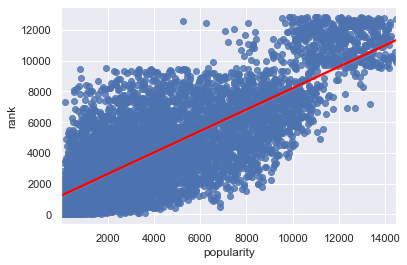

In [11]:
# ratings versus popularity regression plot
sb.set(color_codes=True)
ax = sb.regplot(x="popularity", y="rank", data=anime_df,line_kws={'color':'red'})

In [12]:
# anime_df sorted by rank
anime_sorted_rank_df = anime_df.sort_values(by=['rank'])
anime_sorted_rank_df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
1261,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,64,Finished Airing,...,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",24.0,2009.0
529,32281,Kimi no Na wa.,Your Name.,君の名は。,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,...,NaN,"{'Adaptation': [{'mal_id': 99314, 'type': 'man...","Kadokawa Shoten, Toho, Sound Team Don Juan, La...","Funimation, NYAV Post",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",106.0,2016.0
639,28977,Gintama°,Gintama Season 4,銀魂°,Gintama&#039; (2015),https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Wednesdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",24.0,2015.0
2953,30484,Steins;Gate 0,NaN,シュタインズ・ゲート ゼロ,"Steins,Gate Zero",https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,23,Currently Airing,...,Thursdays at 01:35 (JST),"{'Adaptation': [{'mal_id': 107548, 'type': 'ma...",Nitroplus,Funimation,White Fox,"Sci-Fi, Thriller","['""Fatima (ファティマ)"" by Kanako Itou']","['""LAST GAME"" by Zwei']",23.0,2018.0
1475,9253,Steins;Gate,Steins;Gate,STEINS;GATE,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,24,Finished Airing,...,Wednesdays at 02:05 (JST),"{'Adaptation': [{'mal_id': 17517, 'type': 'man...","Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",24.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,19857,Kagachi-sama Onagusame Tatematsurimasu: Netora...,NaN,かがち様お慰め奉ります ~寝取られ村淫夜噺~ THE ANIMATION,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,1,Finished Airing,...,NaN,[],Pink Pineapple,NaN,Seven,Hentai,[],[],25.0,2013.0
6581,5054,Kojin Jugyou The Animation: Schoolgirl Ready f...,NaN,個人授業 THE ANIMATION～Schoolgirl ready for a priv...,Kojin Jugyou,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,2,Finished Airing,...,NaN,[],Pink Pineapple,NaN,Flavors Soft,Hentai,[],[],30.0,2008.0
6602,3050,Panchira Teacher,Panty Flash Teacher,パンチラティーチャー,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,2,Finished Airing,...,NaN,[],"Green Bunny, Discovery",Media Blasters,AT-2,"Hentai, School",[],[],30.0,2004.0
6619,13595,"Suki de Suki de, Suki de The Animation",NaN,"好きで好きで, すきで THE ANIMATION",NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,2,Finished Airing,...,NaN,"{'Adaptation': [{'mal_id': 36491, 'type': 'man...",Pink Pineapple,NaN,Office Takeout,Hentai,[],[],30.0,2012.0


In [13]:
# anime_df sorted by popularity
anime_sorted_popularity_df = anime_df.sort_values(by=['popularity'])
anime_sorted_popularity_df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
3802,1535,Death Note,Death Note,デスノート,DN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,37,Finished Airing,...,Wednesdays at 00:56 (JST),"{'Adaptation': [{'mal_id': 21, 'type': 'manga'...","VAP, Konami, Ashi Production, Nippon Televisio...",Viz Media,Madhouse,"Mystery, Police, Psychological, Supernatural, ...","['#1: ""the WORLD"" by Nightmare (eps 1-19)', '#...","['#1: ""Alumina"" by Nightmare (eps 1-19)', '#2:...",23.0,2006.0
3897,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,AoT,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Sundays at 01:58 (JST),"{'Adaptation': [{'mal_id': 23390, 'type': 'man...","Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,"Action, Military, Mystery, Super Power, Drama,...","['#1: ""Guren no Yumiya (紅蓮の弓矢)"" by Linked Hori...","['#1: ""Utsukushiki Zankoku na Sekai (美しき残酷な世界)...",24.0,2013.0
3009,11757,Sword Art Online,Sword Art Online,ソードアート・オンライン,"S.A.O, SAO",https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,25,Finished Airing,...,Sundays at 00:00 (JST),"{'Adaptation': [{'mal_id': 21479, 'type': 'man...","Aniplex, Genco, DAX Production, ASCII Media Works",Aniplex of America,A-1 Pictures,"Action, Adventure, Fantasy, Game, Romance","['#1: ""crossing field"" by LiSA (eps 2-14)', '#...","['#1: ""crossing field"" by LiSA (eps 1, 25)', '...",23.0,2012.0
1261,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,64,Finished Airing,...,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",24.0,2009.0
4215,30276,One Punch Man,One Punch Man,ワンパンマン,"One Punch-Man, One-Punch Man, OPM",https://myanimelist.cdn-dena.com/images/anime/...,TV,Web manga,12,Finished Airing,...,Mondays at 01:05 (JST),"{'Adaptation': [{'mal_id': 44347, 'type': 'man...","TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",Viz Media,Madhouse,"Action, Sci-Fi, Comedy, Parody, Super Power, S...","['""THE HERO !! ~Okoreru Kobushi ni Hi wo Tsuke...","['#1: ""Hoshi yori Saki ni Mitsukete Ageru (星より...",24.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6648,37859,Free! Movie 2: Timeless Medley - Yakusoku: Cha...,NaN,劇場版 Free!-Timeless Medley- 約束 キャラクター舞台挨拶,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,4,Finished Airing,...,NaN,"{'Other': [{'mal_id': 35191, 'type': 'anime', ...",NaN,NaN,Kyoto Animation,Comedy,[],[],5.0,2017.0
6644,37860,Free!: Take Your Marks: Character Butai Aisatsu,NaN,特別版 Free!-Take Your Marks- キャラクター舞台挨拶,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,4,Finished Airing,...,NaN,"{'Other': [{'mal_id': 35198, 'type': 'anime', ...",NaN,NaN,Kyoto Animation,Comedy,[],[],6.0,2017.0
6640,37814,Inazuma Eleven Reloaded: Reformation of Soccer,NaN,イナズマイレブン リローデッド ～サッカーの変革へんかく～,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Special,Game,1,Finished Airing,...,NaN,"{'Alternative version': [{'mal_id': 5231, 'typ...",NaN,NaN,OLM,Sports,[],[],24.0,2018.0
6659,37493,Watashitachi no Mirai,NaN,私たちの未来,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,Finished Airing,...,NaN,"{'Other': [{'mal_id': 37494, 'type': 'anime', ...",NaN,NaN,Nippon Animation,Kids,[],[],0.0,2018.0


Because we are primarily concerned with how highly rated an anime is, we will be focussing on the rank of an anime. In the following section, it is further established that popular anime is generally high in rank.

#### **1.1.1** Correlation of Feature Variables

These are correlation tables for the quantatative variables that we will use for analysis.

,anime_id,episodes,airing,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
anime_id,1.000000,-0.109610,0.223734,-0.223733,-0.046057,0.274671,0.205813,-0.032301,-0.054066,-0.205838,0.623290
episodes,-0.109610,1.000000,-0.037289,0.076875,0.068544,-0.049064,-0.009545,0.079572,0.106804,-0.105711,-0.147920
airing,0.223734,-0.037289,1.000000,-0.066910,-0.046482,0.100467,0.079229,-0.030711,-0.004717,-0.086957,0.142681
score,-0.223733,0.076875,-0.066910,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094,0.298989,0.042159
scored_by,-0.046057,0.068544,-0.046482,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949,0.046203,0.110892
rank,0.274671,-0.049064,0.100467,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503,-0.294528,-0.063543
popularity,0.205813,-0.009545,0.079229,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745,-0.159596,-0.236951
members,-0.032301,0.079572,-0.030711,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565,0.039457,0.135725
favorites,-0.054066,0.106804,-0.004717,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000,0.002669,0.031254
duration_min,-0.205838,-0.105711,-0.086957,0.298989,0.046203,-0.294528,-0.159596,0.039457,0.002669,1.000000,-0.183812


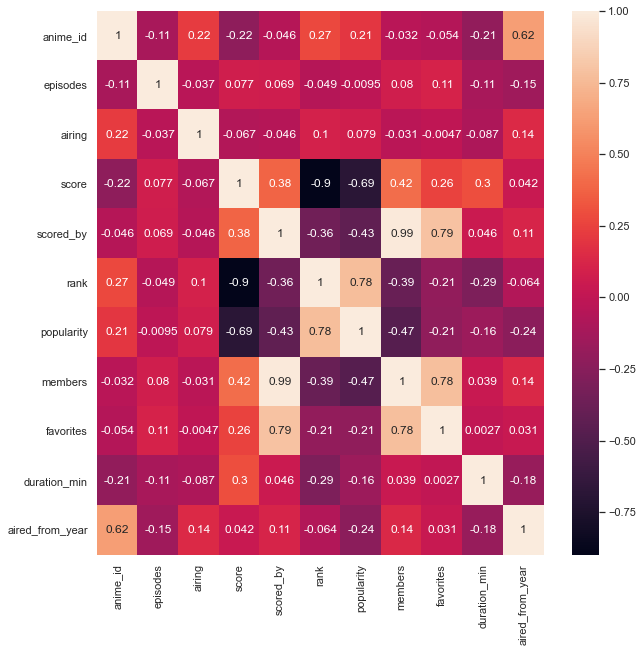

In [14]:
anime_corr = anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(anime_corr, annot=True)

# correlation matrix
anime_corr

As we can see in the correlation matrix above, the correlation between rank and popularity is 0.777302, indicating that there is a significant association between the rank of an anime and its popularity. 

#### **1.1.2** Statistics for Each Column

In [15]:
anime_df.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668.000000,6668.000000,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000
mean,15064.977804,14.276395,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2006.915267
std,13161.364001,40.906929,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.381425
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,2592.000000,1.000000,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,10401.500000,6.000000,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,30301.250000,13.000000,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000
max,37896.000000,1818.000000,9.520000,1.009477e+06,12856.000000,14468.000000,1.456378e+06,106895.000000,163.000000,2018.000000


### **1.2** Score Distribution of All Data

This is the distribution of scores created by the users according to the dataframe. The average score is **6.848998200359928** for all scores according to the distribution.

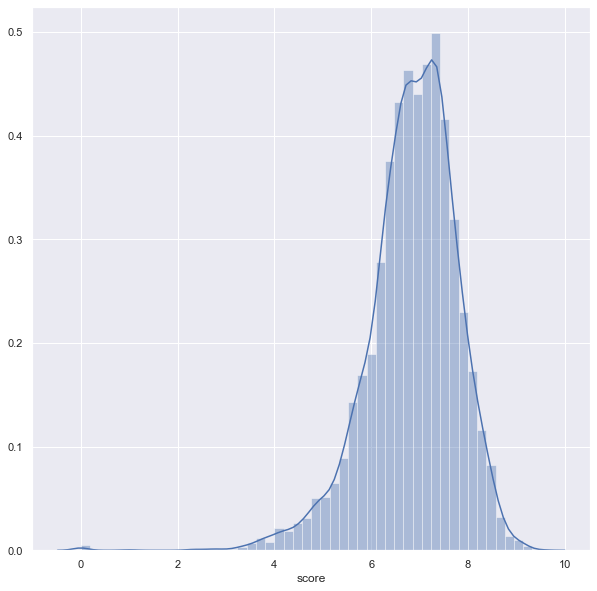

In [16]:
# distribution plot of scores
ax = sb.distplot(anime_df['score'])

In [17]:
# mean of scores
average_score = anime_df['score'].mean()
average_score

6.848998200359928

### **1.3** Scores and Rank by Qualatative Variables
We want to visualize the categorical variables that can contribute to an anime's popularity. Although we cannot build models on categorical variables, it is helpful to visualize what factors contribute to an anime's popularity currently.

Here, we see the distribution and means of the categorical variables that I think have the most impact on an anime's popularity, which are:
1. Genre
2. Production Studio
3. Year of Airing
4. Name of Anime

Note that the Name of Anime categorical variable depends on the viewer Animelists and ratings, which will require merging `anime_df` and `animelist_df`.

#### **1.3.1** Genres
TODO: description of genres

TODO: genres

In [18]:
# boxplot of mean scores per genre
# NOTE: click to enlarge for detailed view
sb.set(rc={'figure.figsize':(700,60)})
sb.set(style="whitegrid")
ax = sb.boxplot(x='new_genre', y='score', data=merged_anime_df)

In [ ]:
# entries per genre
genre_counts = merged_anime_df['new_genre'].value_counts()
all_genres = merged_anime_df['new_genre'].unique()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(all_genres, genre_counts)
plt.show()

#### **1.3.2** Production Studio
TODO: description of genres

In [ ]:
# boxplot of mean scores per studio
# NOTE: click on image to enlarge for detailed view
sb.set(style="whitegrid")
sb.set(rc={'figure.figsize':(700,60)})
ax = sb.boxplot(x='studio', y='score', data=merged_anime_df)

In [ ]:
# sorted by the highest ranked production studio
anime_studio_means = anime_df[['rank','studio']].groupby(['studio']).mean()
anime_studio_means = anime_studio_means.sort_values(by=['rank'])
anime_studio_means

In [ ]:
# number of anime produced by each studio
anime_year_counts = anime_df[['rank', 'studio']].groupby(['studio']).count()
anime_year_counts = anime_year_counts.sort_values(['rank'], ascending=False)
anime_year_counts

In [ ]:
# entries per production studio

studio_counts = merged_anime_df['studio'].value_counts()
all_studios = merged_anime_df['studio'].unique()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(all_studios, studio_counts)
plt.show()

From the boxplot above, we can see that some studios produce anime that is more highly rated. As such, our modelling should include the studio as a categorical variable.

#### **1.3.3** Airing Year
The airing year refers to the year that the anime is released. Anime may have differing popularities depending on recency, and the following EDA serves to provide some analysis as to whether airing date affects rank or not.

In [ ]:
# boxplot of mean scores per year
# NOTE: click on image to enlarge for detailed view
sb.set(rc={'figure.figsize':(300,60)})
ax = sb.boxplot(x='aired_from_year', y='score', data=anime_df)

In [ ]:
# entries per viewing year

year_counts = merged_anime_df['aired_from_year'].value_counts()
all_years = merged_anime_df['aired_from_year'].unique()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(all_years, year_counts)
plt.show()

In [ ]:
# sorted by the highest ranked airing years
anime_year_means = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).mean()
anime_year_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_year_means

In [ ]:
# number of anime aired in each year
anime_year_counts = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).count()
anime_year_counts

From the outputs of the box plots and the sorting by rank, it appears that there is not a significant impact of airing day on popularity. Thus, we will not be using airing date as a categorical variable in our analysis.

#### **1.3.4** Source

Source refers to the original source for the given anime (ie. the anime that the source was adapted from).

In [ ]:
sb.set(rc={'figure.figsize':(200,60)})
ax = sb.boxplot(x='source', y='score', data=anime_df)

In [ ]:
# sorted by the highest ranked sources
anime_source_means = anime_df[['rank', 'source']].groupby(['source']).mean()
anime_source_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_source_means

In [ ]:
# entries per source
source_counts = merged_anime_df['source'].value_counts()
all_sources = merged_anime_df['source'].unique()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(all_sources, source_counts)
plt.show()

### **1.4** Title Frequency

This is for evaluation of ratings per title by users per anime title.

In [ ]:
# sb.set(rc={'figure.figsize':(800,60)})
# matplotlib.rcParams.update(
#     {
#         'text.usetex': False,
#         'font.family': 'stixgeneral',
#         'mathtext.fontset': 'stix',
#     }
# )
# ax = sb.boxplot(x='title', y='score', data=merged_anime_df)

# TODO: fix this pls

## **2.** Feature Selection/Extraction

**notes:**
* sort by popularity

for reference, the columns are:

['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year']

### **2.1** Dropping Uncessary Categorical Variables

In [ ]:
# dropping uncessary features
# new_anime_df = merged_anime_df.groupby(['source'])
new_anime_df = merged_anime_df[['anime_id', 'username', 'title', 'score', 'scored_by', 'rank', 'popularity', 'members', 'source', 'favorites', 'studio', 'genre']]
new_anime_df

### **2.2** Encoding Categorical Variables

We have to encode the categorical variables also going to be used for our analysis. This includes:
* Genre
* Studio
* Title of Anime

In [ ]:
# studio
encoder = LabelEncoder()
studio_labels = encoder.fit_transform(new_anime_df['studio'])

# mappings
studio_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
studio_mappings # from the output, there are 710 studios in total

In [ ]:
# source
source_labels = encoder.fit_transform(new_anime_df['source'])

# mappings
source_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
source_mappings

In [ ]:
# title
title_labels = encoder.fit_transform(new_anime_df['title'])

# mappings
title_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
title_mappings

In [ ]:
new_anime_df['studio_labels'] = studio_labels
new_anime_df['source_labels'] = source_labels
new_anime_df['title_labels'] = title_labels

### **2.3** Score Threshold

#### **2.3.1** Updated Correlations

In [ ]:
# updated correlation heatmap based on feature variables
updated_anime_corr = new_anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(updated_anime_corr, annot=True)

# correlation matrix
updated_anime_corr

#### **2.3.2** Score Mean Threshold

Because the feature variables yielded little correlation to the outcome variable (ie. score), we are only going to investigate the anime whose rating pass a threshold. We denote these anime with a binary measure, denoted `above_average`, added to `new_anime_df`.

In [ ]:
new_anime_df['score'].mean()

In [ ]:
# average score is 7.58
# 1 for above average score, 0 for below
pd.options.mode.chained_assignment = None
new_anime_df['above_average'] = np.where(new_anime_df['score'] >= 7.58, '1', '0')
new_anime_df

## **3.** Modelling 

### **3.1** Baseline Model: Linear Regression

#### **3.1.1** Training, Test, and Validation Sets

In [ ]:
features = new_anime_df[['title_labels', 'scored_by', 'popularity', 'members', 'source_labels', 'favorites', 'studio_labels']].copy()
labels = new_anime_df['above_average']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
# TODO: update test size and random state with JUSTIFICATIONS

In [ ]:
# only used for validation at the end - ie. for unseen validation data
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
# TODO: update test size and random state with JUSTIFICATION

#### **3.1.2** Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [ ]:
# comparison of output values
lr_df = pd.DataFrame({'actual': y_test.values.flatten(), 'predicted': y_pred.flatten()})
lr_df

In [ ]:
# accuracy evaluations
# mean absolute
print(metrics.mean_absolute_error(y_test, y_pred))
# mean squared error
print(metrics.mean_squared_error(y_test, y_pred))
# root mean squared error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### **3.2** Random Forest Model

#### **3.2.1** PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_temp = pd.DataFrame(x_train)
x_temp

x_train_pca = StandardScaler().fit_transform(x_temp)
pca = PCA()
train_2 = pca.fit_transform(x_train_pca)

np.set_printoptions(suppress=True)
pca.explained_variance_ratio_
pca.components_

pcaplot = np.cumsum((pca.explained_variance_ratio_))
plt.plot(pcaplot)
print(pcaplot)

In [ ]:
pca2 = PCA(n_components = 5)
x_train = pca2.fit_transform(x_train)

#### **3.2.2** Random Forest Model

In [ ]:
# uses maximum depth and number 

rf = RandomForestClassifier(random_state = 42)
parameters = {
    'max_depth': [10, 20],
    'n_estimators': [2, 4, 8, 16, 32, 64]
}

rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(x_train, y_train)

In [ ]:
joblib.dump(rf_cv.best_estimator_, './parameters/rf.pkl')

#### **3.2.3** Fitting Random Forest

In [ ]:
x_test = pca2.fit_transform(x_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20)
rf_model.fit(x_train, y_train)
rf_predicted_values = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, rf_predicted_values)
print(accuracy)

TODO: accuracy discussion

#### **3.2.4** Relative Importance of Input Variables

In [ ]:
# TODO: print relative importances using rf_model
new_columns = []
for name, val in zip(features.columns, rf_model.feature_importances_):
    print(name, ": ", val)
    new_columns.append(name)

### **3.3** Multilayer Perceptron

Multilayer Perceptrons (MLP) are a class of feed-forward neural networks, meant to emulate the neurophysiological process by whic hthe brain processes and stores information.

TODO: write more.

**Hyperparameters:** to optimize for our model, we are going to use `hidden_layer_sizes`, which refers to the number of nodes in some hidder layer, and `activation` as the activation function.

**Activation function:** going to compute logistic and relu activations. 
TODO: more justification and discussion on this.

#### **3.3.1** MLP

In [ ]:
mlp = MLPClassifier()

In [ ]:
parameters = {
    'hidden_layer_sizes': [(10,), (50,)],
    'activation': ['logistic', 'relu']
}

# TODO: plot for hidden_layer_sizes
# TODO: activation function justification

In [ ]:
mlp_cv = GridSearchCV(mlp, parameters, cv=5)
mlp_cv.fit(x_train, y_train.values.ravel())

In [ ]:
joblib.dump(mlp_cv.best_estimator_, './parameters/mlp.pkl')

In [ ]:
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)
mlp_predicted_values = mlp_model.predict(x_test)
score = accuracy_score(y_test,mlp_predicted_values)
print(score)

Accuracy analysis: TODO

#### **3.3.2** Assessing Performance

In [ ]:
loss_values = mlp_model.loss_curve_
mlp_model.score

In [ ]:
# plotting to show epoch accuracy
plt.plot(loss_values)
plt.ylim((0.61,0.640))
plt.axvline(10,0,0.7)
plt.show()

### **3.4** Model Validation

In [ ]:
# load models
models = {}
# TODO: add linear regression accuracy
for model in ['rf', 'mlp']:
    models[model] =joblib.load('./parameters/{}.pkl'.format(model))
models

In [ ]:
def evaluate(name, model, features, labels):
    pred = model.predict(features)
    accuracy = accuracy_score(labels, pred)
    print('{}: accuracy: {}'.format(name, accuracy))

In [ ]:
print('lr:', 'mae: ', metrics.mean_absolute_error(y_test, y_pred))
print('    mse: ', metrics.mean_squared_error(y_test, y_pred))
print('    rmse:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
for name, model in models.items():
    evaluate(name, model, x_val, y_val)
    # TODO: why is linear regression causing 0.99 accuracy score?

## **4.** Conclusion